In [13]:
"""Analysis of results generated by the iterative round testing script"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename

In [4]:
basic = [
    "iterative_round_results_basic_j12_s2_0",
    "iterative_round_results_basic_j15_s2_0",
    "iterative_round_results_basic_j15_s3_0",
    "iterative_round_results_basic_j25_s5_0"
]

In [5]:
encoded_filenames = basic
x_axis = 'Total Iterations'
title = '{} of basic model'.format(x_axis)

In [23]:
data = []
test_name: str = ""

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename('iterative_round', encoded_filename)
    with open(filename) as file:
        file_data = json.load(file)
        for pos, model_result in enumerate(file_data):
            if len(model_result) > 15:
                max_iterations = model_result['cost 0, change 1']['total_iterations']
                max_money = model_result['cost 0, change 1']['total money']
                for name, result in model_result.items():
                    data.append([pos, model_name, name, result['initial_cost'], result['price_change'],
                                 result['total_iterations'], result['total_messages'], result['total money'],
                                 max_iterations / result['total_iterations'], max_money / result['total money']])

df = pd.DataFrame(data, columns=["Pos", "Model Name", "Algorithm Name", "Initial cost", 
                                 "Price Change", "Total Iterations", "Total Messages", "Total Money", 
                                 "Total Iterations Speed", "Percent Total Money"])
df

,Pos,Model Name,Algorithm Name,Initial cost,Price Change,Total Iterations,Total Messages,Total Money,Total Iterations Speed,Percent Total Money
0,0,Jobs: 12 Servers: 2,"cost 0, change 1",0,1,239,1418,235,1.000000,1.000000
1,0,Jobs: 12 Servers: 2,"cost 0, change 2",0,2,125,734,242,1.912000,0.971074
2,0,Jobs: 12 Servers: 2,"cost 0, change 5",0,5,45,254,205,5.311111,1.146341
3,0,Jobs: 12 Servers: 2,"cost 0, change 10",0,10,27,146,230,8.851852,1.021739
4,0,Jobs: 12 Servers: 2,"cost 0, change 15",0,15,18,92,210,13.277778,1.119048
...,...,...,...,...,...,...,...,...,...,...
4995,49,Jobs: 25 Servers: 5,"cost 40, change 1",40,1,739,8837,733,0.986468,0.986357
4996,49,Jobs: 25 Servers: 5,"cost 40, change 2",40,2,306,3642,602,2.382353,1.200997
4997,49,Jobs: 25 Servers: 5,"cost 40, change 5",40,5,152,1793,730,4.796053,0.990411
4998,49,Jobs: 25 Servers: 5,"cost 40, change 10",40,10,74,858,690,9.851351,1.047826


c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


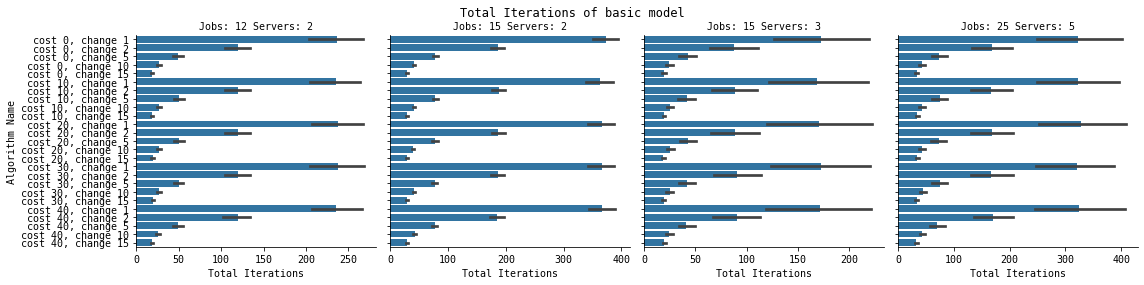

In [7]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=4)
g = g.map(sns.barplot, x_axis, "Algorithm Name").set_titles("{col_name}")

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g

In [8]:
df1 = df.loc[df['Model Name'] == 'Job 25 Server 5']

g = sns.FacetGrid(df1, col='Pos', col_wrap=5, hue='Algorithm Name')
g = g.map(sns.scatterplot, 'Total Iterations', 'Total Money')

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Total Iterations and Money for 25 Jobs and 5 Servers")

g

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 1080x0 with 0 Axes>

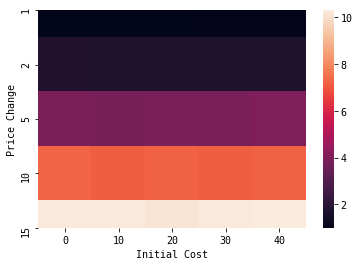

In [24]:
datamap = pd.DataFrame([(price_change, initial_cost, np.mean(df[(df['Initial cost'] == initial_cost) & (df['Price Change'] == price_change)]['Total Iterations Speed']))
    for initial_cost in df['Initial cost'].unique()
    for price_change in df['Price Change'].unique()
], columns=['Price Change', 'Initial Cost', 'Value']).pivot('Price Change', 'Initial Cost', 'Value')
g = sns.heatmap(datamap)